In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Симуляция аддитивного сезонного ряда

In [58]:
t = np.linspace(1,100, 100, dtype = int)
s = np.array([-5, 5, 15, -1]*25)
e = np.random.normal(loc = 0, scale = 5, size = len(t))
y_add = t + s + e

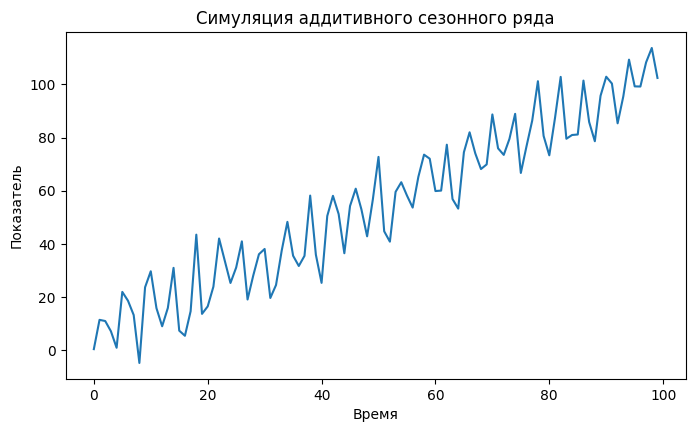

In [59]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(y_add)
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.title('Симуляция аддитивного сезонного ряда')
plt.show()

### Симуляция мультипликативного сезонного ряда

In [36]:
t = np.linspace(1,100, 100, dtype = int)
s = np.array([0.8, 1, 1.2, 1.1]*25)
e = np.random.uniform(low = 0.8, high = 1.2, size = len(t))
y_mult = t*s*e

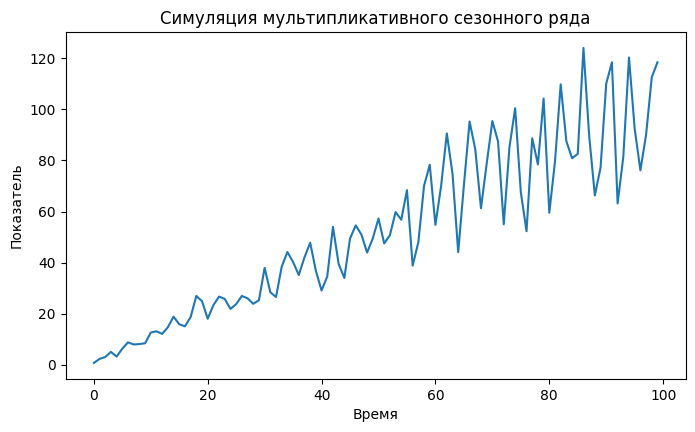

In [37]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(y_mult)
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.title('Симуляция мультипликативного сезонного ряда')
plt.show()

### Разложение аддитивного ряда

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
result_add = seasonal_decompose(y_add, model='additive', period = 4)

In [71]:
pd.DataFrame(
    {
        'Original': result_add.observed, 
        'Trend': result_add.trend, 
        'Seasonal': result_add.seasonal,
        'Residual': result_add.resid
    }
)

,Original,Trend,Seasonal,Residual
0,0.446742,NaN,-9.405267,NaN
1,11.460479,NaN,1.219577,NaN
2,11.017366,7.588974,11.780508,-8.352116
3,7.173080,8.966233,-3.594819,1.801665
4,0.963203,11.231816,-9.405267,-0.863346
...,...,...,...,...
95,99.226230,102.382974,-3.594819,0.438075
96,99.171565,104.528092,-9.405267,4.048740
97,108.242383,105.471965,1.219577,1.550841
98,113.662810,NaN,11.780508,NaN


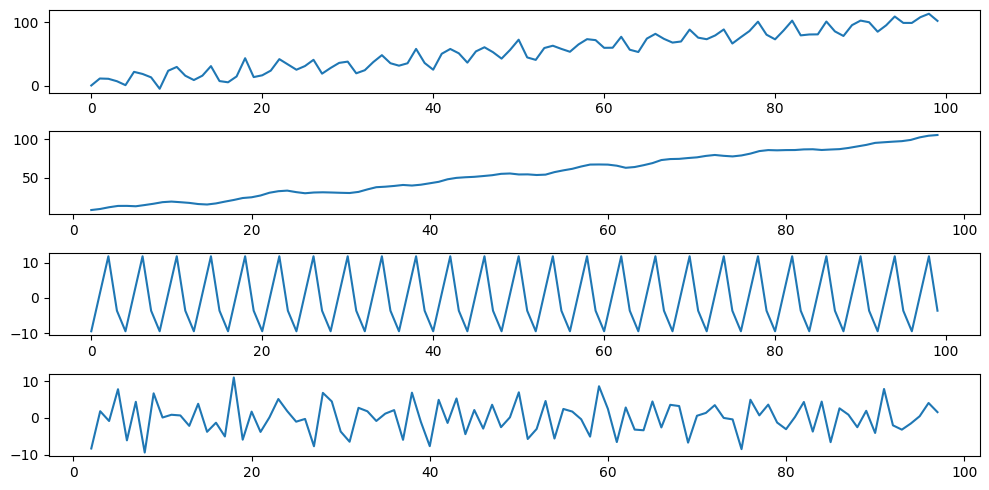

In [65]:
fig, ax = plt.subplots(4,1, figsize = (10, 5))
ax[0].plot(result_add.observed)
ax[1].plot(result_add.trend)
ax[2].plot(result_add.seasonal)
ax[3].plot(result_add.resid)
plt.tight_layout()
plt.show()

### Разложение мультипликативного ряда

In [73]:
result_mult = seasonal_decompose(y_mult, model='multiplicative', period = 4)

In [74]:
pd.DataFrame(
    {
        'Original':result_mult.observed, 
        'Trend': result_mult.trend, 
        'Seasonal': result_mult.seasonal,
        'Residual': result_mult.resid
    }
)

,Original,Trend,Seasonal,Residual
0,0.737259,NaN,0.788098,NaN
1,2.331597,NaN,0.967622,NaN
2,3.053047,3.112032,1.188956,0.825133
3,5.073917,3.924311,1.055324,1.225163
4,3.241874,5.143666,0.788098,0.799730
...,...,...,...,...
95,92.309081,93.603385,1.055324,0.934473
96,76.109096,93.714873,0.788098,1.030500
97,90.026273,96.013758,0.967622,0.969014
98,112.561863,NaN,1.188956,NaN


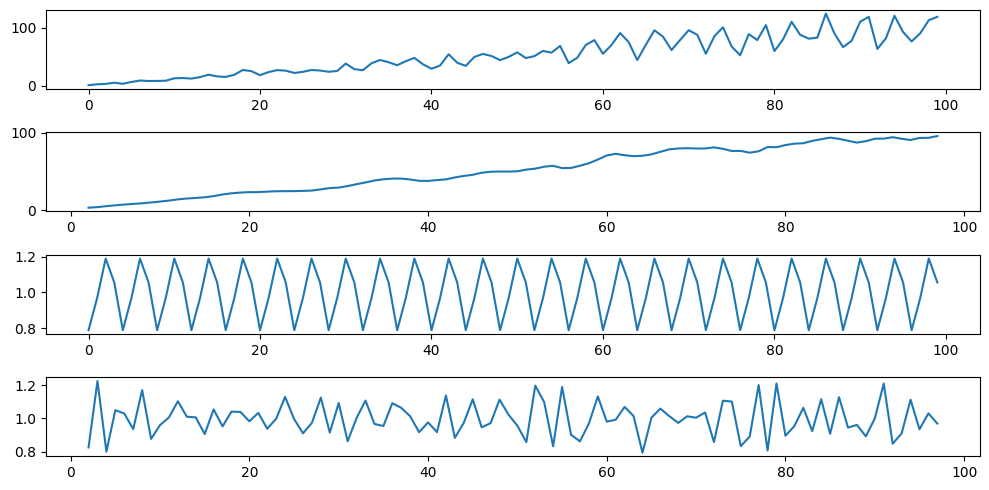

In [68]:
fig, ax = plt.subplots(4,1, figsize = (10, 5))
ax[0].plot(result_mult.observed)
ax[1].plot(result_mult.trend)
ax[2].plot(result_mult.seasonal)
ax[3].plot(result_mult.resid)
plt.tight_layout()
plt.show()